<h1>Cities of Russia</h1>

<i><b>Introduction</b></i>. The idea of ​​my research is to help people, who want to change their place of residence. My family ran into
with a problem - children are often sick, both sons are allergic. We realized that the problem is the environmental situation in the city where we live.
Therefore, we decided to look for a city to change their place of residence. We do not want to leave the country. Only change the city. But there are many cities in Russia and it is very difficult to make the right choice.
The study will help me analyze the cities and make the right choice.
This study will be useful to those who want to move to another city; real estate agencies of individual cities, in addition,
it may become a takeover for changes in troubled cities:
<ul>
<li>People who plan to change their place of residence will be able to visually assess the capabilities of individual cities.</li>
<li>Real estate agencies will be able to use the results of research to advertise real estate in individual cities.</li>
    <li>City leaders can get a clear picture of the state of their city.</li></ul>
    I need a lot of different <i><b>data</b></i>:
<ol><li>location of cities;</li>
    <li>ecological situation in cities;</li>
    <li>the population growth rate of the city (what is the trend?: more come or leave the city)</li>
    <li>cost of housing.</li></ol>
As additional data, I need data on vacancies and the level of wages in cities. However, I decided that this information is for
each user will be personal. People work in various industries and it is difficult to build recommendations for each industry in this study.
Data sources:
<ul>
    <li><a href="https://showdata.gks.ru/report/279006/">https://showdata.gks.ru/report/279006/</a></li>
<li><a href = "https://www.domofond.ru/statya/ekologicheskiy_reyting_200_gorodov_rossii_za_2019_god/100219">https://www.domofond.ru/statya/ekologicheskiy_reyting_200_gorodov_rossii_za_2019_god/100219</a></li>
    <li><a href="https://rosrealt.ru/cena/kvartira">https://rosrealt.ru/cena/kvartira</a></li></ul>


In [1]:
CLIENT_ID = 'W2JYYSIUDB1ND1AOGFS0LWHR1TLIQQDFWIIGYS41GOYIFNYE' # your Foursquare ID
CLIENT_SECRET = 'MV5XU4B3WIIF4FW5AYGV1ONSAPO5AKMABQPXD2V4BRBRB32J' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: W2JYYSIUDB1ND1AOGFS0LWHR1TLIQQDFWIIGYS41GOYIFNYE
CLIENT_SECRET:MV5XU4B3WIIF4FW5AYGV1ONSAPO5AKMABQPXD2V4BRBRB32J


In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import matplotlib.pyplot as plt
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    numpy-1.17.3               |   py36h95a1406_0         5.2 MB  conda-forge
    sci

In [3]:
prirost_city=pd.read_csv('prirost_Russ.csv',';')
prirost_city.head()

,city,2018 г.,2017 г.,2016 г.,2015 г.,2014 г.,2013 г.,2012 г.
0,Якутск,2226,801,665,1407,2264,4711,4600
1,Чебоксары,1580,242,4774,2845,2380,854,2042
2,Грозный,-1300,-442,-835,-1711,-1552,-2499,-3197
3,Абакан,1909,2256,2069,1820,1870,2336,1501
4,Ижевск,495,979,167,-1457,2456,2370,996


In [4]:
prirost_city.rename (columns={'Unnamed: 0': 'city','2018 г.':'2018','2017 г.':'2017','2016 г.':'2016','2015 г.':'2015','2014 г.':'2014',
                             '2013 г.':'2013','2012 г.':'2012'}, inplace = True)
prirost_city.head()
prirost_city.describe()

,2018,2017,2016,2015,2014,2013,2012
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,360.007143,218.464286,444.442857,276.507143,732.778571,1336.178571,1348.000000
std,2458.600990,2401.040756,2735.490492,2570.861341,2691.266151,4100.111697,3734.304554
min,-6851.000000,-5827.000000,-4331.000000,-5106.000000,-5666.000000,-6113.000000,-5785.000000
25%,-718.750000,-756.250000,-704.000000,-1012.500000,-777.000000,-759.500000,-699.000000
50%,-53.500000,-162.000000,0.000000,-222.500000,31.500000,164.500000,313.000000
75%,811.250000,802.500000,982.000000,700.500000,1917.750000,2202.500000,2263.500000
max,11525.000000,12758.000000,20208.000000,17705.000000,10605.000000,23091.000000,16303.000000


In [5]:
NA = prirost_city[prirost_city['2018']==''].index
prirost_city.drop(NA, inplace=True)
prirost_city
NA = prirost_city[prirost_city['city']=='Город Москва столица Российской Федерации город федерального значения'].index
prirost_city.drop(NA, inplace=True)
NA = prirost_city[prirost_city['city']=='Город Санкт-Петербург город федерального значения'].index
prirost_city.drop(NA, inplace=True)
prirost_city

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,city,2018,2017,2016,2015,2014,2013,2012
0,Якутск,2226,801,665,1407,2264,4711,4600
1,Чебоксары,1580,242,4774,2845,2380,854,2042
2,Грозный,-1300,-442,-835,-1711,-1552,-2499,-3197
3,Абакан,1909,2256,2069,1820,1870,2336,1501
4,Ижевск,495,979,167,-1457,2456,2370,996
...,...,...,...,...,...,...,...,...
135,Армавир,-399,-65,-432,-934,-490,7,782
136,Краснодар,10573,11849,20208,17705,-4507,17060,16303
137,Рубцовск,-674,-347,-253,567,-3,1013,-994
138,Бийск,-143,-141,-139,-475,180,-1381,-2136


In [7]:
population=pd.read_csv('Population.csv',',')
population.head()

,city,populat
0,Санкт-Петербург,5352000
1,Новосибирск,1613000
2,Екатеринбург,1469000
3,Нижний Новгород,1259000
4,Казань,1244000


In [8]:
prirost_city['Total'] =  prirost_city.sum (axis = 1)
prirost_city['Mean'] =  prirost_city.mean(axis = 1)
prirost_city

,city,2018,2017,2016,2015,2014,2013,2012,Total,Mean
0,Якутск,2226,801,665,1407,2264,4711,4600,16674,4168.50
1,Чебоксары,1580,242,4774,2845,2380,854,2042,14717,3679.25
2,Грозный,-1300,-442,-835,-1711,-1552,-2499,-3197,-11536,-2884.00
3,Абакан,1909,2256,2069,1820,1870,2336,1501,13761,3440.25
4,Ижевск,495,979,167,-1457,2456,2370,996,6006,1501.50
...,...,...,...,...,...,...,...,...,...,...
135,Армавир,-399,-65,-432,-934,-490,7,782,-1531,-382.75
136,Краснодар,10573,11849,20208,17705,-4507,17060,16303,89191,22297.75
137,Рубцовск,-674,-347,-253,567,-3,1013,-994,-691,-172.75
138,Бийск,-143,-141,-139,-475,180,-1381,-2136,-4235,-1058.75


In [9]:
prirost_city= pd.merge(prirost_city, population[['city','populat']], on='city')
prirost_city

,city,2018,2017,2016,2015,2014,2013,2012,Total,Mean,populat
0,Якутск,2226,801,665,1407,2264,4711,4600,16674,4168.50,312000
1,Чебоксары,1580,242,4774,2845,2380,854,2042,14717,3679.25,492000
2,Грозный,-1300,-442,-835,-1711,-1552,-2499,-3197,-11536,-2884.00,297000
3,Абакан,1909,2256,2069,1820,1870,2336,1501,13761,3440.25,184000
4,Ижевск,495,979,167,-1457,2456,2370,996,6006,1501.50,648000
...,...,...,...,...,...,...,...,...,...,...,...
126,Армавир,-399,-65,-432,-934,-490,7,782,-1531,-382.75,191000
127,Краснодар,10573,11849,20208,17705,-4507,17060,16303,89191,22297.75,900000
128,Рубцовск,-674,-347,-253,567,-3,1013,-994,-691,-172.75,144000
129,Бийск,-143,-141,-139,-475,180,-1381,-2136,-4235,-1058.75,202000


In [10]:
prirost_city['Mean_populat'] =  prirost_city['2018']/prirost_city['populat']
prirost_city.head()

,city,2018,2017,2016,2015,2014,2013,2012,Total,Mean,populat,Mean_populat
0,Якутск,2226,801,665,1407,2264,4711,4600,16674,4168.50,312000,0.007135
1,Чебоксары,1580,242,4774,2845,2380,854,2042,14717,3679.25,492000,0.003211
2,Грозный,-1300,-442,-835,-1711,-1552,-2499,-3197,-11536,-2884.00,297000,-0.004377
3,Абакан,1909,2256,2069,1820,1870,2336,1501,13761,3440.25,184000,0.010375
4,Ижевск,495,979,167,-1457,2456,2370,996,6006,1501.50,648000,0.000764


In [11]:
eco=pd.read_csv('ecology.csv',',')
eco

,city,ecology 2019,ecology 2018
0,Геленджик,8.8,8.5
1,Майкоп,8.7,8.4
2,Ейск,8.7,7.9
3,Ессентуки,8.6,7.5
4,Сочи,8.6,8.4
...,...,...,...
195,Якутск,3.6,0.0
196,Воркута,3.6,4.7
197,Белово,3.4,0.0
198,Киселевск,2.7,3.8


In [14]:
rus_city= pd.merge(prirost_city, eco[['city','ecology 2019', 'ecology 2018']], on='city')
rus_city

,city,2018,2017,2016,2015,2014,2013,2012,Total,Mean,populat,Mean_populat,ecology 2019,ecology 2018
0,Якутск,2226,801,665,1407,2264,4711,4600,16674,4168.50,312000,0.007135,3.6,0.0
1,Чебоксары,1580,242,4774,2845,2380,854,2042,14717,3679.25,492000,0.003211,7.2,7.1
2,Грозный,-1300,-442,-835,-1711,-1552,-2499,-3197,-11536,-2884.00,297000,-0.004377,7.7,7.3
3,Абакан,1909,2256,2069,1820,1870,2336,1501,13761,3440.25,184000,0.010375,6.8,7.2
4,Ижевск,495,979,167,-1457,2456,2370,996,6006,1501.50,648000,0.000764,6.8,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,Армавир,-399,-65,-432,-934,-490,7,782,-1531,-382.75,191000,-0.002089,7.6,7.9
120,Краснодар,10573,11849,20208,17705,-4507,17060,16303,89191,22297.75,900000,0.011748,7.0,7.1
121,Рубцовск,-674,-347,-253,567,-3,1013,-994,-691,-172.75,144000,-0.004681,6.1,4.8
122,Бийск,-143,-141,-139,-475,180,-1381,-2136,-4235,-1058.75,202000,-0.000708,6.9,6.3


In [15]:
room=pd.read_csv('costs.csv',',')
room.head()

,city,cost room
0,Красногорск,110771.0
1,Лобня,104971.0
2,Люберцы,104565.0
3,Новый Уренгой,100859.0
4,Видное,98294.0


In [16]:
rus_city= pd.merge(rus_city, room[['city','cost room']], on='city')
rus_city

,city,2018,2017,2016,2015,2014,2013,2012,Total,Mean,populat,Mean_populat,ecology 2019,ecology 2018,cost room
0,Чебоксары,1580,242,4774,2845,2380,854,2042,14717,3679.25,492000,0.003211,7.2,7.1,41401.0
1,Абакан,1909,2256,2069,1820,1870,2336,1501,13761,3440.25,184000,0.010375,6.8,7.2,50749.0
2,Ижевск,495,979,167,-1457,2456,2370,996,6006,1501.50,648000,0.000764,6.8,6.7,44839.0
3,Казань,3171,3482,5527,3626,8791,8537,7359,40493,10123.25,1244000,0.002549,6.8,6.5,81421.0
4,Владикавказ,-2525,-2122,-1858,-2221,-1486,-2896,-3540,-16648,-4162.00,306000,-0.008252,7.0,6.5,35124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Красноярск,821,945,5848,6629,9620,12543,12890,49296,12324.00,1091000,0.000753,5.2,5.0,60449.0
88,Новороссийск,1481,2065,2268,3055,-1644,4257,3233,14715,3678.75,273000,0.005425,6.9,6.9,64483.0
89,Армавир,-399,-65,-432,-934,-490,7,782,-1531,-382.75,191000,-0.002089,7.6,7.9,43899.0
90,Краснодар,10573,11849,20208,17705,-4507,17060,16303,89191,22297.75,900000,0.011748,7.0,7.1,55483.0


In [17]:
rus_city.describe()

,2018,2017,2016,2015,2014,2013,2012,Total,Mean,populat,Mean_populat,ecology 2019,ecology 2018,cost room
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000
mean,602.673913,411.347826,805.543478,587.945652,1279.815217,1986.554348,2231.641304,7905.521739,1976.380435,4.756739e+05,0.001052,6.300000,6.085870,50802.630435
std,2681.155103,2733.870828,3212.718606,2962.719223,3058.106118,4182.631538,4217.394312,19073.231429,4768.307857,3.491381e+05,0.005743,1.007336,1.408497,15735.110433
min,-6851.000000,-5827.000000,-4331.000000,-5106.000000,-5666.000000,-6113.000000,-5785.000000,-27049.000000,-6762.250000,1.040000e+05,-0.010162,3.900000,0.000000,26976.000000
25%,-638.750000,-843.500000,-533.250000,-934.250000,-526.750000,-202.250000,-257.500000,-2767.000000,-691.750000,2.237500e+05,-0.002105,5.500000,5.800000,40345.000000
50%,59.500000,71.500000,150.500000,-172.500000,704.500000,803.500000,1013.000000,3385.500000,846.375000,3.555000e+05,0.000161,6.500000,6.300000,47194.500000
75%,1595.000000,1372.750000,1934.750000,1788.500000,2469.250000,3051.000000,3528.000000,14715.500000,3678.875000,5.992500e+05,0.003567,6.925000,6.825000,58876.250000
max,10573.000000,12758.000000,20208.000000,17705.000000,10605.000000,17060.000000,16303.000000,89191.000000,22297.750000,1.613000e+06,0.028491,8.700000,8.400000,104565.000000


In [ ]:
citys = prirost_city['city']
#with open('/resources/data/Example3.csv', 'a') as testwritefile:
for i in citys:
        address = i
        try:
            geolocator = Nominatim(user_agent="foursquare_agent")
            location = geolocator.geocode(address)
            str1 = i+';'+str(location.longitude)+';'+str(location.latitude)
            print(str1)
            #testwritefile.write(str1)
        except ValueError:
            str1 = i+';'+'0'+';'+'0'
            print(str1)
            #testwritefile.write(str1)

In [18]:
coords=pd.read_csv('coords.csv',';')
coords

,city,longitude,latitude
0,Якутск,129.732086,62.027287
1,Чебоксары,47.244960,56.130719
2,Грозный,45.698967,43.316845
3,Абакан,91.438873,53.715290
4,Ижевск,53.209417,56.866557
...,...,...,...
136,Армавир,44.037701,40.156513
137,Краснодар,38.976481,45.035257
138,Рубцовск,81.217617,51.527626
139,Бийск,85.214867,52.539490


In [19]:
rus_city= pd.merge(rus_city, coords[['city','longitude', 'latitude']], on='city')
rus_city

,city,2018,2017,2016,2015,2014,2013,2012,Total,Mean,populat,Mean_populat,ecology 2019,ecology 2018,cost room,longitude,latitude
0,Чебоксары,1580,242,4774,2845,2380,854,2042,14717,3679.25,492000,0.003211,7.2,7.1,41401.0,47.244960,56.130719
1,Абакан,1909,2256,2069,1820,1870,2336,1501,13761,3440.25,184000,0.010375,6.8,7.2,50749.0,91.438873,53.715290
2,Ижевск,495,979,167,-1457,2456,2370,996,6006,1501.50,648000,0.000764,6.8,6.7,44839.0,53.209417,56.866557
3,Казань,3171,3482,5527,3626,8791,8537,7359,40493,10123.25,1244000,0.002549,6.8,6.5,81421.0,49.124227,55.782355
4,Владикавказ,-2525,-2122,-1858,-2221,-1486,-2896,-3540,-16648,-4162.00,306000,-0.008252,7.0,6.5,35124.0,44.682110,43.024593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Красноярск,821,945,5848,6629,9620,12543,12890,49296,12324.00,1091000,0.000753,5.2,5.0,60449.0,92.872515,56.009097
88,Новороссийск,1481,2065,2268,3055,-1644,4257,3233,14715,3678.75,273000,0.005425,6.9,6.9,64483.0,37.769071,44.723958
89,Армавир,-399,-65,-432,-934,-490,7,782,-1531,-382.75,191000,-0.002089,7.6,7.9,43899.0,44.037701,40.156513
90,Краснодар,10573,11849,20208,17705,-4507,17060,16303,89191,22297.75,900000,0.011748,7.0,7.1,55483.0,38.976481,45.035257


In [20]:
rus_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 17 columns):
city            92 non-null object
2018            92 non-null int64
2017            92 non-null int64
2016            92 non-null int64
2015            92 non-null int64
2014            92 non-null int64
2013            92 non-null int64
2012            92 non-null int64
Total           92 non-null int64
Mean            92 non-null float64
populat         92 non-null int64
Mean_populat    92 non-null float64
ecology 2019    92 non-null float64
ecology 2018    92 non-null float64
cost room       92 non-null float64
longitude       92 non-null float64
latitude        92 non-null float64
dtypes: float64(7), int64(9), object(1)
memory usage: 12.9+ KB


In [21]:
main = rus_city[['city','Mean_populat','ecology 2018','cost room','longitude', 'latitude']]
main.head(9)

,city,Mean_populat,ecology 2018,cost room,longitude,latitude
0,Чебоксары,0.003211,7.1,41401.0,47.244960,56.130719
1,Абакан,0.010375,7.2,50749.0,91.438873,53.715290
2,Ижевск,0.000764,6.7,44839.0,53.209417,56.866557
3,Казань,0.002549,6.5,81421.0,49.124227,55.782355
4,Владикавказ,-0.008252,6.5,35124.0,44.682110,43.024593
5,Саранск,0.001330,7.4,46122.0,45.183830,54.186710
6,Йошкар-Ола,0.008026,7.2,38112.0,47.897246,56.632825
7,Петрозаводск,0.005308,7.1,50445.0,34.390007,61.790039
8,Махачкала,-0.001238,4.9,32931.0,47.504872,42.983024


In [22]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92 entries, 0 to 91
Data columns (total 6 columns):
city            92 non-null object
Mean_populat    92 non-null float64
ecology 2018    92 non-null float64
cost room       92 non-null float64
longitude       92 non-null float64
latitude        92 non-null float64
dtypes: float64(5), object(1)
memory usage: 5.0+ KB


In [23]:
main.rename (columns={'ecology 2018': 'Ecology', 'cost room':'cost'}, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [24]:
NA = main[main['Ecology']==0].index
main.drop(NA, inplace=True)
NA = main[main['Mean_populat']==0].index

main.drop(NA, inplace=True)
main

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,city,Mean_populat,Ecology,cost,longitude,latitude
0,Чебоксары,0.003211,7.1,41401.0,47.244960,56.130719
1,Абакан,0.010375,7.2,50749.0,91.438873,53.715290
2,Ижевск,0.000764,6.7,44839.0,53.209417,56.866557
3,Казань,0.002549,6.5,81421.0,49.124227,55.782355
4,Владикавказ,-0.008252,6.5,35124.0,44.682110,43.024593
...,...,...,...,...,...,...
87,Красноярск,0.000753,5.0,60449.0,92.872515,56.009097
88,Новороссийск,0.005425,6.9,64483.0,37.769071,44.723958
89,Армавир,-0.002089,7.9,43899.0,44.037701,40.156513
90,Краснодар,0.011748,7.1,55483.0,38.976481,45.035257


In [25]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 0 to 91
Data columns (total 6 columns):
city            87 non-null object
Mean_populat    87 non-null float64
Ecology         87 non-null float64
cost            87 non-null float64
longitude       87 non-null float64
latitude        87 non-null float64
dtypes: float64(5), object(1)
memory usage: 4.8+ KB


<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>
<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

In [28]:
main.corr()

,Mean_populat,Ecology,cost,longitude,latitude
Mean_populat,1.000000,0.319290,0.398083,-0.135363,0.071448
Ecology,0.319290,1.000000,0.189893,-0.197663,-0.054240
cost,0.398083,0.189893,1.000000,0.167461,0.175536
longitude,-0.135363,-0.197663,0.167461,1.000000,0.026499
latitude,0.071448,-0.054240,0.175536,0.026499,1.000000


In [29]:
%%capture
! pip install seaborn

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0, 104636.29843159273)

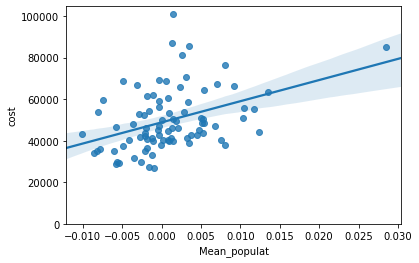

In [31]:
sns.regplot(x="Mean_populat", y="cost", data=main)
plt.ylim(0,)

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [32]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(main['cost'], main['Mean_populat'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.39808265294779915  with a P-value of P = 0.00013429244814229738


(0, 8.966828629552321)

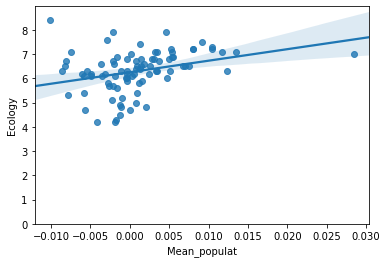

In [33]:
sns.regplot(x="Mean_populat", y="Ecology", data=main)
plt.ylim(0,)

In [34]:
pearson_coef, p_value = stats.pearsonr(main['Ecology'], main['Mean_populat'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.31929048225901213  with a P-value of P = 0.002574963502627546


In [35]:
from sklearn import linear_model
import numpy as np
df = main
msk = np.random.rand(len(df)) < 0.8
train = main[msk]
test = main[~msk]
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Ecology','cost']])
y = np.asanyarray(train[['Mean_populat']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[1.89535429e-03 1.49973568e-07]]


In [36]:
main.describe()

,Mean_populat,Ecology,cost,longitude,latitude
count,87.000000,87.000000,87.000000,87.000000,87.000000
mean,0.000921,6.298851,49806.597701,55.212444,53.795519
std,0.005783,0.860164,14787.162311,25.878423,5.059576
min,-0.010162,4.200000,26976.000000,6.231168,40.156513
25%,-0.002160,5.950000,40240.000000,38.881579,51.753442
50%,0.000220,6.300000,46136.000000,45.183830,54.629569
75%,0.003476,6.850000,57617.000000,63.240533,56.372011
max,0.028491,8.400000,100859.000000,137.020782,68.970665


In [37]:
ecology = []

for key in main.Ecology:
    if key <= 5.9:
        ecology.append("Very high")
    elif  5.9 < key <= 6.3:
         ecology.append("High")
    elif  6.3< key <= 6.9:
         ecology.append("Elevated")
    else:
         ecology.append("Low")
cost1 = []
for key in main.cost:
    if key <= 40285:
        cost1.append("1")
    elif 40285 < key <= 46625:
         cost1.append("2")
    elif  46625< key <= 58772:
        cost1.append("3")
    else:
         cost1.append("4")

In [38]:
# instantiate a feature group for the incidents in the dataframe
latitude=53.851091
longitude = 54.801093
russian_map = folium.Map(location=[latitude, longitude], zoom_start=12)
eco = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(main.latitude, main.longitude):
    eco.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.01
        )
    )
  
    
# add pop-up text to each marker on the map
latitudes = list(main.latitude)
longitudes = list(main.longitude)
labels = list(ecology)

for lat, lng, label in zip(latitudes, longitudes, labels):
    if label == 'Very high':
        folium.Marker([lat, lng], popup=label,  icon=folium.Icon(color='black', icon='cloud')).add_to(russian_map)
    elif  label == 'High':
         folium.Marker([lat, lng], popup=label,  icon=folium.Icon(color='gray', icon='cloud')).add_to(russian_map)
    elif label == 'Elevated':
         folium.Marker([lat, lng], popup=label, icon=folium.Icon(color='lightgreen', icon='cloud')).add_to(russian_map)
    else:
        folium.Marker([lat, lng], popup=label, icon=folium.Icon(color='green', icon='cloud')).add_to(russian_map)
    
  # add pop-up text to each marker on the map
latitudes = list(main.latitude)
longitudes = list(main.longitude)
labels = list(cost1)

for lat, lng, label in zip(latitudes, longitudes, labels):
    if label == '1':
        folium.CircleMarker([lat, lng], popup=label, radius = 9, fill_color='blue', color='blue', fill_opacity = 0.9).add_to(russian_map)
    elif  label == '2':
         folium.CircleMarker([lat, lng], popup=label, radius = 9, fill_color='orange', color='orange', fill_opacity = 0.9).add_to(russian_map)
    elif label == '3':
         folium.CircleMarker([lat, lng], popup=label, radius = 9, fill_color='red', color='red', fill_opacity = 0.9).add_to(russian_map)
    else:
        folium.CircleMarker([lat, lng], popup=label, radius = 9,  fill_color='darkred', color='darkred', fill_opacity = 0.9).add_to(russian_map)




# add incidents to map
new = russian_map.add_child(eco)
new

In [39]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [40]:
Stat = main[['Mean_populat','Ecology','cost']]
Stat.head(9)
from sklearn.preprocessing import StandardScaler
X = Stat.values[:,0:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet


array([[ 3.98287850e-01,  9.36790725e-01, -5.71734186e-01],
       [ 1.64415240e+00,  1.05372156e+00,  6.41005709e-02],
       [-2.73692829e-02,  4.69067379e-01, -3.37887385e-01],
       [ 2.83095451e-01,  2.35205706e-01,  2.15035685e+00],
       [-1.59530891e+00,  2.35205706e-01, -9.98684846e-01],
       [ 7.11190572e-02,  1.28758324e+00, -2.50619949e-01],
       [ 1.23564554e+00,  1.05372156e+00, -7.95446266e-01],
       [ 7.62964693e-01,  9.36790725e-01,  4.34230178e-02],
       [-3.75573247e-01, -1.63568768e+00, -1.14784891e+00],
       [-6.33591584e-01, -5.83310150e-01, -5.47383647e-01],
       [ 2.53545531e-01, -1.15586804e-01,  1.10695664e+00],
       [-1.92754637e+00,  2.45689160e+00, -4.56035115e-01],
       [-4.49160504e-01,  7.02929052e-01, -1.52766291e+00],
       [ 7.35629272e-01,  1.34403260e-03, -1.00095525e-01],
       [-7.73387947e-03, -1.05103350e+00,  2.27616484e-01],
       [-1.14615996e+00, -1.86954935e+00, -1.36707178e+00],
       [-4.88230221e-01, -2.45420354e+00

In [41]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 2 1 0 1 1 1 2 1 1 2 1 1 1 2 1 1 1 2 0 0 2 2 2 1 1 1 1 1 2 1 1 1 1 1 2 1
 2 2 1 1 1 2 1 2 2 2 0 1 0 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 1 2 2 1 1 1 1 1 1
 2 1 2 2 1 0 2 1 2 2 1 2 2]


In [88]:
Stat["Cluster"] = labels
Stat.head(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Mean_populat,Ecology,cost,Cluster
0,0.003211,7.1,41401.0,1
1,0.010375,7.2,50749.0,0
2,0.000764,6.7,44839.0,1
3,0.002549,6.5,81421.0,2
4,-0.008252,6.5,35124.0,1


In [89]:
Stat.groupby('Cluster').mean()

,Mean_populat,Ecology,cost
Cluster,,,
0,0.001965,6.483333,59152.833333
1,-0.000474,6.160784,40042.352941
2,0.007559,6.550000,86071.500000


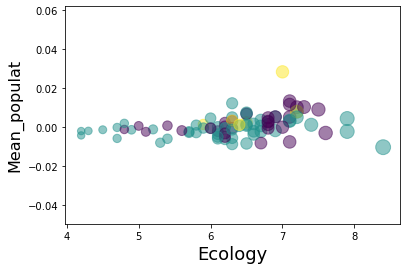

In [108]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 1], X[:, 0], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Ecology', fontsize=18)
plt.ylabel('Mean_populat', fontsize=16)

plt.show()

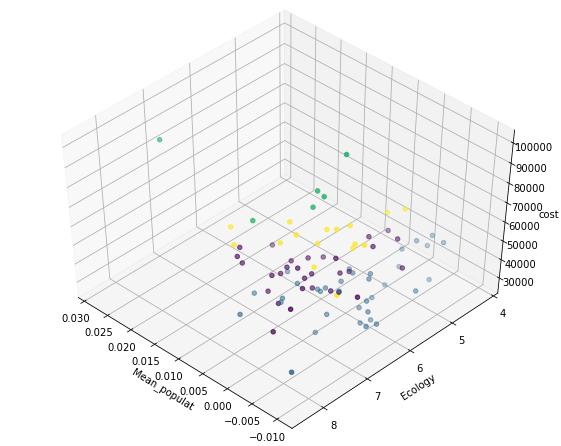

In [86]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Mean_populat')
ax.set_ylabel('Ecology')
ax.set_zlabel('cost')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c= labels.astype(np.float))